## Support Vector Machines

Large *margin classification*, SVM classifier fitting the widest (margin) *street* poassible between classes. The nature of SVM makes it very sensitve to feature scaling. 

Soft Margin classification is normally used to balance between the width of the *street* and number of valations. Sklearn uses hyper parameter C. (small C = more violations, but wide street, large C otherwise)


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # get petal length, petal width
y = (iris["target"]==2).astype(np.float64) # set target 1/0 for class Iris-Virginca

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_scv", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_scv',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## Polynomial 

### Polynomial Features
Improve features to better separate for datasets not linearly separable. 

### Polynomial Kernel
The issue with polynomial feature is that if degree is too low, the benefit is limisted, if it is too high, it will create a lot of features and training becomes slow. In SVM you can solve this issue by applying a math *kernel trick*.


[0 1]
[0 1]


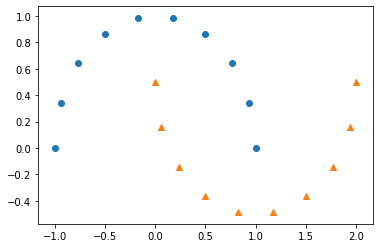

In [52]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

from matplotlib import pyplot as plt

dataset = make_moons(20)

c1 = np.where(dataset[1]==0)
c2 = np.where(dataset[1]==1)


X = dataset[0]
y = dataset[1]

plt.scatter(dataset[0][:,0][c1], dataset[0][:,1][c1], marker='o')
plt.scatter(dataset[0][:,0][c2], dataset[0][:,1][c2], marker='^')

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C = 10, loss = "hinge", max_iter=10000))
])

polynomial_kernel_svm_clf = Pipeline([    
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='poly', degree=3, coef0=1, C=5))
])

polynomial_svm_clf.fit(X, y)
print(polynomial_svm_clf.predict([[-1.0, 0.2], [1, -0.4]]))

polynomial_kernel_svm_clf.fit(X, y)
print(polynomial_svm_clf.predict([[-1.0, 0.2], [1, -0.4]]))

## Visualise Decision Boundary

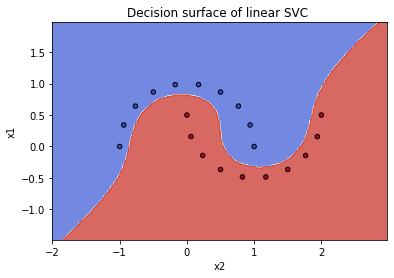

In [56]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polynomial_kernel_svm_clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('x1')
ax.set_xlabel('x2')
#ax.set_xticks(())
#ax.set_yticks(())
ax.set_title(title)
#ax.legend()
plt.show()